## This is a small tutorial on data cleaning, preprocessing and the idea of a pipeline for changing raw data to clean data. The primary purpose of this tutorial is to showcase benefits of my package 'preprocessor' in the above mentioned scenarios.

In [67]:
from preprocessor.misc import read_csv
import numpy as np
import pandas as pd

### Using our read_csv is a wrapper over pandas function of same name which is better at reading datetime columns

In [18]:
data = read_csv("example.csv", verbose =True, encoding = 'latin')
data.head()

Trying to read datetime columns


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 75.00it/s]


,mixed,cat,date,num
0,NaN,HT33,2013-02-17,10.172877
1,NaN,HT33,2013-02-08,10.172877
2,NaN,HT33,2013-02-17,10.191187
3,NaN,HT33,2013-02-16,10.188137
4,NaN,8D97,2013-02-26,0.000000


### Lets look at values in each column

In [19]:
data['mixed'].value_counts()

0              257
100            157
1               69
2               55
NEIN            51
              ... 
155590           1
29               1
50273            1
99.99838371      1
240616           1
Name: mixed, Length: 1014, dtype: int64

#### On first glance we can tell that the first column 'mixed' has very small and large numbers as well as text in some of its values, now lets look at second column

In [20]:
data['cat'].value_counts()

5S31    4565
KS43    3893
3D33    3669
XA53    2704
KS41    1888
        ... 
3Z52       1
4P33       1
8W51       1
8S51       1
2M52       1
Name: cat, Length: 814, dtype: int64

#### The second column look like a regular categorical column, however, we can see there are some values which have just one occurance

In [22]:
data['date'].value_counts()[:10]

2013-01-16    1514
2013-02-25    1500
2013-01-27    1493
2013-02-15    1491
2013-01-11    1489
2013-01-03    1480
2013-02-03    1478
2013-01-23    1475
2013-02-04    1474
2013-02-28    1470
Name: date, dtype: int64

#### The third column look like a regular datetime column, but lets say we want to use this in a machine learning model, in that we cant use dates in their raw form

In [24]:
data['num'].value_counts()

0.000000      8344
100.000000    2802
99.987790      824
100.001600     516
100.000070     421
              ... 
23.943835        1
65.783690        1
0.001530         1
83.621280        1
19.262700        1
Name: num, Length: 9535, dtype: int64

#### Finally a regular numerical column, with nans ofcourse

### Now lets use our preprocessor package to create a piple line for this data

In [27]:
verbose = True

In [30]:
# First lets try to deal with the mixed column(s)

from preprocessor.feature_extractor import extract_numericals_forall

# extract_numericals_forall goes through all categorical columns and tries to see if it is a mixed column
# if it is, it creates a new column with the column name + '_numerical' as suffix and puts all numerical
# values in the new column
df1 = extract_numericals_forall(data,verbose =verbose)
df1.head()

creating cat_numerical: 100%|████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  6.01it/s]


Cheking columns provided in Include 2
Gathering useless columns, columns with just one unique value


Useless columns found 0 : 100%|█████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 399.61it/s]


Deleting..
Deletion complete
Dataframe shape after deleting  (86273, 6)


,mixed,cat,date,num,mixed_numerical,cat_numerical
0,NaN,HT33,2013-02-17,10.172877,NaN,NaN
1,NaN,HT33,2013-02-08,10.172877,NaN,NaN
2,NaN,HT33,2013-02-17,10.191187,NaN,NaN
3,NaN,HT33,2013-02-16,10.188137,NaN,NaN
4,NaN,8D97,2013-02-26,0.000000,NaN,NaN


#### We see we were able to generate two new numerical columns, lets analyze them

In [38]:
print(df1['mixed_numerical'].value_counts(), df1['cat_numerical'].value_counts().nlargest(10))

0.000000e+00    257
1.000000e+02    157
1.000000e+00     69
2.000000e+00     55
3.000000e+00     31
               ... 
9.999841e+01      1
1.449463e+06      1
9.999750e+01      1
4.278300e+05      1
1.638170e+05      1
Name: mixed_numerical, Length: 1012, dtype: int64 5.000000e+51    588
2.000000e+51    351
5.000000e+52    348
7.000000e+01    340
5.000000e+71    336
7.000000e+41    180
4.000000e+91    150
2.000000e+52    137
7.000000e+21    132
8.000000e+53    129
Name: cat_numerical, dtype: int64


#### We see that mixed_numerical looks like a sensible column while on first glance cat_numerical seems to be constructed of values in cat column which just happen to be interpretable as numericals. Therefore we decide to just extract numericals from one column instead of all categorical columns in our pipleline

In [39]:
from preprocessor.feature_extractor import extract_numericals

df1 = extract_numericals(data,col = 'mixed',verbose =verbose)
df1.head()

creating mixed_numerical


,mixed,cat,date,num,mixed_numerical
0,NaN,HT33,2013-02-17,10.172877,NaN
1,NaN,HT33,2013-02-08,10.172877,NaN
2,NaN,HT33,2013-02-17,10.191187,NaN
3,NaN,HT33,2013-02-16,10.188137,NaN
4,NaN,8D97,2013-02-26,0.000000,NaN


#### Now that we have extracted the numbers from 'mixed', we want to remove numericals from the actual 'mixed' column in order to make it purely categorical

In [47]:
from preprocessor.imputer import remove_numericals_from_categories

# Delete all numericals from 'mixed' column
df2 = remove_numericals_from_categories(df1,include=['mixed'],verbose =verbose)
df2['mixed'].value_counts()

Removing numericals from categorical columns provided in Include 1


Removing numericals from mixed: 100%|████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.87it/s]


NEIN            51
Eastern Asia     8
Name: mixed, dtype: int64

#### At this point we can assume that 'mixed' is not a useful column anymore so we can delete it, since our df2 object is a regular pandas data structure we can use all pandas functions without any problem

In [49]:
df3 = df2.drop(['mixed'], axis=1)
df3.head()

,cat,date,num,mixed_numerical
0,HT33,2013-02-17,10.172877,NaN
1,HT33,2013-02-08,10.172877,NaN
2,HT33,2013-02-17,10.191187,NaN
3,HT33,2013-02-16,10.188137,NaN
4,8D97,2013-02-26,0.000000,NaN


#### Awsome, now that we have dealt with 'mixed', lets focus on date column now

In [60]:
# Lets try to extract some features from the date column

from preprocessor.feature_extractor import extract_datetime_features_forall
from preprocessor.imputer import remove_datetimes

# extract_datetime_features_forall goes through all datetime columns and tries to extract 15 predefined features from them
df4 = extract_datetime_features_forall(df3,verbose =verbose)
# since we have the features extracted, no need for keeping datetime columns anymore
df4 = remove_datetimes(df4, verbose = verbose) 
df4.head()

Extracting 15 datetime features from date: 100%|█████████████████████████████████████████| 1/1 [00:03<00:00,  3.53s/it]


Cheking columns provided in Include 15
Gathering useless columns, columns with just one unique value


Useless columns found 5: 100%|████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 576.97it/s]


Deleting..
Deletion complete
Dataframe shape after deleting  (86273, 14)
Deleting all Datetime columns


,cat,num,mixed_numerical,date_month,date_day,date_dayofyear,date_weekofyear,date_week,date_dayofweek,date_is_month_start,date_is_month_end,date_is_quarter_start,date_is_year_start
0,HT33,10.172877,NaN,2,17,48,7,7,6,0,0,0,0
1,HT33,10.172877,NaN,2,8,39,6,6,4,0,0,0,0
2,HT33,10.191187,NaN,2,17,48,7,7,6,0,0,0,0
3,HT33,10.188137,NaN,2,16,47,7,7,5,0,0,0,0
4,8D97,0.000000,NaN,2,26,57,9,9,1,0,0,0,0


#### Great, so we have extracted 15 features from one datetime column, and we could have extracted n*15 where n is number of date time columns in the data

#### Next, Lets try to see if we have any infs or -infs in the data, lets say for now I want to make a new feature column for whenever we find infs in a column

In [61]:
# Lets try to extract some features from the date column

from preprocessor.feature_extractor import extract_is_inf_forall

# extract_is_inf_forall goes through all numerical columns and create a new column for infs if any
# if seperate_ninf is true then the new column has 3 unique values (1 for inf, 0 for no inf & -1 for ninf)
# otherwise the new column is a boolean which is true if any kind of inf was encountered
df5 = extract_is_inf_forall(df4,verbose =verbose, seperate_ninf = True)
df5.head()

Adding num_isinf column: 100%|█████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 32.79it/s]


Cheking columns provided in Include 12
Gathering useless columns, columns with just one unique value


Useless columns found 12: 100%|███████████████████████████████████████████████████████| 12/12 [00:00<00:00, 387.13it/s]


Deleting..
Deletion complete
Dataframe shape after deleting  (86273, 13)


,cat,num,mixed_numerical,date_month,date_day,date_dayofyear,date_weekofyear,date_week,date_dayofweek,date_is_month_start,date_is_month_end,date_is_quarter_start,date_is_year_start
0,HT33,10.172877,NaN,2,17,48,7,7,6,0,0,0,0
1,HT33,10.172877,NaN,2,8,39,6,6,4,0,0,0,0
2,HT33,10.191187,NaN,2,17,48,7,7,6,0,0,0,0
3,HT33,10.188137,NaN,2,16,47,7,7,5,0,0,0,0
4,8D97,0.000000,NaN,2,26,57,9,9,1,0,0,0,0


#### We can see that since no infs were found in any of the data, we might conclude that we might never encounter infs in our data and hence never include this step in our final piple line

#### Now if we remember correctly some of our numerical columns had numbers of varying range, may be outliers which might affect rest of our statistics, So lets identify outliers and remove if we find any

In [62]:
from preprocessor.feature_extractor import extract_is_outlier_forall

# extract_is_outlier_forall goes through all numerical columns and against each column creates a new boolean column which has true if the value is marked outlier
# replace_with if None then leaves outliers intact in the actual column
df6 = extract_is_outlier_forall(df4,verbose =verbose, replace_with = np.nan)
df6.head()

Replacing outliers in num with nan: 100%|██████████████████████████████████████████████| 12/12 [00:00<00:00, 17.27it/s]


Cheking columns provided in Include 12
Gathering useless columns, columns with just one unique value


Useless columns found 7: 100%|█████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 59.70it/s]


Deleting..
Deletion complete
Dataframe shape after deleting  (86273, 18)


,cat,num,mixed_numerical,date_month,date_day,date_dayofyear,date_weekofyear,date_week,date_dayofweek,date_is_month_start,date_is_month_end,date_is_quarter_start,date_is_year_start,mixed_numerical_isoutlier,date_is_year_start_isoutlier,date_is_quarter_start_isoutlier,date_is_month_end_isoutlier,num_isoutlier
0,HT33,10.172877,NaN,2.0,17.0,48.0,7.0,7.0,6.0,0.0,0.0,0.0,0.0,0,0,0,0,0
1,HT33,10.172877,NaN,2.0,8.0,39.0,6.0,6.0,4.0,0.0,0.0,0.0,0.0,0,0,0,0,0
2,HT33,10.191187,NaN,2.0,17.0,48.0,7.0,7.0,6.0,0.0,0.0,0.0,0.0,0,0,0,0,0
3,HT33,10.188137,NaN,2.0,16.0,47.0,7.0,7.0,5.0,0.0,0.0,0.0,0.0,0,0,0,0,0
4,8D97,0.000000,NaN,2.0,26.0,57.0,9.0,9.0,1.0,0.0,0.0,0.0,0.0,0,0,0,0,0


#### Looks like we could only find outliers for some datetime features, depending on if we find it a valid thing in the context of our problem we can ignore or keep this step. For this specific example, in the final pipeline, I'll move this step before extracting date time features in order to don't search outliers in datetime feature columns.

#### Now lets deal with nans in our numerical columns, we will first create _isnull column against all numerical columns to preserve the nan information

In [63]:
from preprocessor.feature_extractor import extract_is_nan_forall

# extract_is_nan_forall goes through all numerical columns and against each column creates a new boolean column which has 
# true if the value was nan, this perserves the information of nans for when we finally substitute a valid numerical
# value against all nulls

df7 = extract_is_nan_forall(df6,verbose =verbose)
df7.head()

Adding num_isnull column: 100%|███████████████████████████████████████████████████████| 17/17 [00:00<00:00, 102.41it/s]


Cheking columns provided in Include 5
Gathering useless columns, columns with just one unique value


Useless columns found 0 : 100%|█████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 556.20it/s]


Deleting..
Deletion complete
Dataframe shape after deleting  (86273, 23)


,cat,num,mixed_numerical,date_month,date_day,date_dayofyear,date_weekofyear,date_week,date_dayofweek,date_is_month_start,...,mixed_numerical_isoutlier,date_is_year_start_isoutlier,date_is_quarter_start_isoutlier,date_is_month_end_isoutlier,num_isoutlier,mixed_numerical_isnull,date_is_year_start_isnull,date_is_quarter_start_isnull,date_is_month_end_isnull,num_isnull
0,HT33,10.172877,NaN,2.0,17.0,48.0,7.0,7.0,6.0,0.0,...,0,0,0,0,0,True,False,False,False,False
1,HT33,10.172877,NaN,2.0,8.0,39.0,6.0,6.0,4.0,0.0,...,0,0,0,0,0,True,False,False,False,False
2,HT33,10.191187,NaN,2.0,17.0,48.0,7.0,7.0,6.0,0.0,...,0,0,0,0,0,True,False,False,False,False
3,HT33,10.188137,NaN,2.0,16.0,47.0,7.0,7.0,5.0,0.0,...,0,0,0,0,0,True,False,False,False,False
4,8D97,0.000000,NaN,2.0,26.0,57.0,9.0,9.0,1.0,0.0,...,0,0,0,0,0,True,False,False,False,False


#### Once we have all the required information preserved, lets replace nans with median for each column, means are usually susceptible to outliers (One can't be too careful!) 

In [64]:
from preprocessor.imputer import fillnans

# fillnans goes through all numerical columns and fills nans with either Mean, Median or any other provided value
df8 = fillnans(df7,verbose =verbose, by = 'median')
df8.head()

Filling nans in all columns


Filling nans in num_isoutlier with 0.0: 100%|█████████████████████████████████████████| 22/22 [00:00<00:00, 201.82it/s]


,cat,num,mixed_numerical,date_month,date_day,date_dayofyear,date_weekofyear,date_week,date_dayofweek,date_is_month_start,...,mixed_numerical_isoutlier,date_is_year_start_isoutlier,date_is_quarter_start_isoutlier,date_is_month_end_isoutlier,num_isoutlier,mixed_numerical_isnull,date_is_year_start_isnull,date_is_quarter_start_isnull,date_is_month_end_isnull,num_isnull
0,HT33,10.172877,99.995805,2.0,17.0,48.0,7.0,7.0,6.0,0.0,...,0,0,0,0,0,True,False,False,False,False
1,HT33,10.172877,99.995805,2.0,8.0,39.0,6.0,6.0,4.0,0.0,...,0,0,0,0,0,True,False,False,False,False
2,HT33,10.191187,99.995805,2.0,17.0,48.0,7.0,7.0,6.0,0.0,...,0,0,0,0,0,True,False,False,False,False
3,HT33,10.188137,99.995805,2.0,16.0,47.0,7.0,7.0,5.0,0.0,...,0,0,0,0,0,True,False,False,False,False
4,8D97,0.000000,99.995805,2.0,26.0,57.0,9.0,9.0,1.0,0.0,...,0,0,0,0,0,True,False,False,False,False


#### We have come to far, now all that remains is our categorical column, we will simply on hot encode it, however, we will use a cutoff of 100 (an educated guess, which might differ for your data). The idea is to not create new columns for a value that only occured insignificant time in the data.

In [66]:
from preprocessor.feature_extractor import onehot_encode_all

# onehot_encode_all goes through all categorical columns and one hot encodes them
# allow_na if True means treat None or Null as a class
# onehot_encode_all drops the actual column after one hot encoding it
df9 = onehot_encode_all(df8,verbose =verbose, cutoff = 100, cutoff_class = 'other', allow_na = True)
df9.head()

Dropping cat: 100%|██████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.58it/s]


Cheking columns provided in Include 2
Gathering useless columns, columns with just one unique value


Useless columns found 1: 100%|██████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 333.41it/s]


Deleting..
Deletion complete
Dataframe shape after deleting  (86273, 208)


,num,mixed_numerical,date_month,date_day,date_dayofyear,date_weekofyear,date_week,date_dayofweek,date_is_month_start,date_is_month_end,...,cat_onehot__YC41,cat_onehot__YG41,cat_onehot__YG47,cat_onehot__YG63,cat_onehot__ZD31,cat_onehot__ZD71,cat_onehot__ZW41,cat_onehot__ZW42,cat_onehot__ZW61,cat_onehot__other
0,10.172877,99.995805,2.0,17.0,48.0,7.0,7.0,6.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,10.172877,99.995805,2.0,8.0,39.0,6.0,6.0,4.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,10.191187,99.995805,2.0,17.0,48.0,7.0,7.0,6.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,10.188137,99.995805,2.0,16.0,47.0,7.0,7.0,5.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.000000,99.995805,2.0,26.0,57.0,9.0,9.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


#### finally looks like our data is all numbers, with no nans, no nulls and almost ready for any algorthim that operates on numbers, but wait!

#### Some algorthims are really sensitive if features are in a very different scale of magnitude, therefore we normalize

In [70]:
from sklearn.preprocessing import RobustScaler, StandardScaler
from preprocessor.imputer import normalize

# normalize, normalizes each column of the dataframe using provided scaler
df_scaled_standard = normalize(df9, verbose = verbose) #StandardScaler is dfault scaler
# You can read benefits of robust scaler at 
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html
df_scaled_robust = normalize(df9, verbose = verbose, scaler = RobustScaler())

Normalizing numbers from all columns
Normalizing numbers from all columns


#### Lets visualize at the changes in the scales of a feature after scaling

C:\Users\Ahsan\.conda\envs\preprocessor\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x214144bc710>)

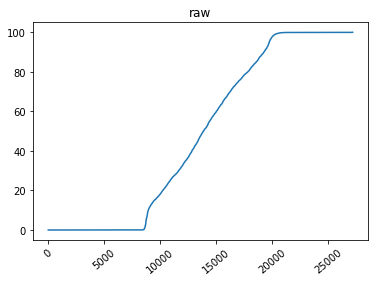

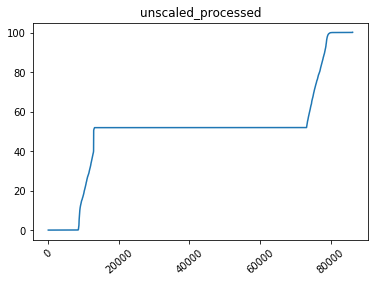

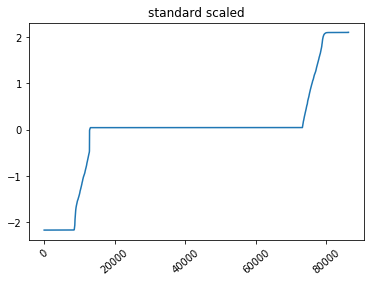

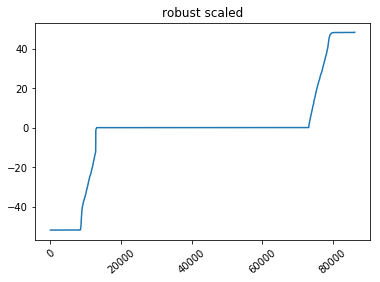

In [74]:
from preprocessor.plotter import plot_line
%matplotlib inline

col = 'num'
plot_line(data,col,title = 'raw')
plot_line(df9,col,title = 'unscaled_processed')
plot_line(df_scaled_standard,col,title = 'standard scaled')
plot_line(df_scaled_robust,col,title = 'robust scaled')

#### Looking at the results we can choose which ever scale of features suits us and work with it.

### Final pipeline 

In [78]:
# imports 

from preprocessor.feature_extractor import extract_is_nan_forall, extract_is_outlier_forall,extract_datetime_features_forall,\
extract_is_inf_forall, onehot_encode_all, extract_numericals_forall, extract_numericals
from preprocessor.imputer import fillnans, remove_datetimes, fillinfs, normalize, remove_numericals_from_categories,\
remove_single_value_features

verbose = False
df10 = data


df10 = extract_numericals(df10,col = 'mixed',verbose =verbose)
df10 = remove_numericals_from_categories(df10,include=['mixed'],verbose =verbose)
df10 = df10.drop(['mixed'], axis=1)
df10 = extract_is_outlier_forall(df10,verbose =verbose, replace_with = np.nan)
df10 = extract_datetime_features_forall(df10,verbose =verbose)
df10 = remove_datetimes(df10, verbose = verbose) 
df10 = extract_is_nan_forall(df10,verbose =verbose)
df10 = fillnans(df10,verbose =verbose, by = 'median')
df10 = onehot_encode_all(df10,verbose =verbose, cutoff = 100, cutoff_class = 'other', allow_na = True)
df10 = normalize(df10, verbose = verbose)
df10.head()


Useless columns found 1: 100%|██████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 333.23it/s]


,num,mixed_numerical,mixed_numerical_isoutlier,num_isoutlier,date_month,date_day,date_dayofyear,date_weekofyear,date_week,date_dayofweek,...,cat_onehot__YC41,cat_onehot__YG41,cat_onehot__YG47,cat_onehot__YG63,cat_onehot__ZD31,cat_onehot__ZD71,cat_onehot__ZW41,cat_onehot__ZW42,cat_onehot__ZW61,cat_onehot__other
0,-1.734031,-0.051559,-0.025257,-0.110462,0.936943,0.222063,1.009583,0.828775,0.828775,1.550356,...,-0.046482,-0.054125,-0.036054,-0.045213,-0.034405,-0.057266,-0.053475,-0.05434,-0.050562,-0.475733
1,-1.734031,-0.051559,-0.025257,-0.110462,0.936943,-0.811541,0.489264,0.426666,0.426666,0.528812,...,-0.046482,-0.054125,-0.036054,-0.045213,-0.034405,-0.057266,-0.053475,-0.05434,-0.050562,-0.475733
2,-1.733251,-0.051559,-0.025257,-0.110462,0.936943,0.222063,1.009583,0.828775,0.828775,1.550356,...,-0.046482,-0.054125,-0.036054,-0.045213,-0.034405,-0.057266,-0.053475,-0.05434,-0.050562,-0.475733
3,-1.733381,-0.051559,-0.025257,-0.110462,0.936943,0.107219,0.951770,0.828775,0.828775,1.039584,...,-0.046482,-0.054125,-0.036054,-0.045213,-0.034405,-0.057266,-0.053475,-0.05434,-0.050562,-0.475733
4,-2.167578,-0.051559,-0.025257,-0.110462,0.936943,1.255668,1.529902,1.632991,1.632991,-1.003505,...,-0.046482,-0.054125,-0.036054,-0.045213,-0.034405,-0.057266,-0.053475,-0.05434,-0.050562,2.102018


#### Final Comments: We were able to make a pipeline which is able to make our 4 raw columns into 202 columns what any data analysis algorthim can use